## Pattern Recognition and Machine Learning - Assignment
### CCE2502 - Year 2022-2023- Semester II, v.0.1.0
####  developed by - Adrian Muscat, 2023
---
### Write your name, ID Card Number and class below

Name: Juan Scerri

ID: 0305003L

Class: Computer Science and Mathematics (Second Year)

---


In this assignment you will be developing Python code to experiment with the k-Nearest Neighbour (k-NN) predictive model.


All questions are graded and total to 100.
This assignment contributes to a maximum of 30% of the final study unit score. 


## NOTE: 

This work is to be attempted individually. It is essential that the work you eventually submit and present for your assignment consists only of your own work; use of copied material will be treated as plagiarism. Discussion is only permitted on general issues, and it is absolutely forbidden to discuss specific details with anyone and/or share results.

Please sign and attached the plagiarism form at:

https://www.um.edu.mt/ict/students/formsguidelines/


In [1]:
# We first load some modules
import matplotlib.pyplot as plt
import numpy as np
import pickle
import csv
import functools
%matplotlib inline

# In addition you will need the following libraries
# scipy
# sklearn
# time

## Helper functions and dataset

Below are some helper functions and code to load and split datasets (do not change these functions)

In [2]:
# Use this function for plotting datasets as scatter graphs
def data_scatter_plot(X,y):
    """
    Plots a scatter graph for a 2-D dataset
    X : Feature numpy array of size (m,N), 
            m=number of examples (rows)
            N = number of features (columns)
    y : Output label numpy array of size (m,1) or (m,)
    """
    mk ={0:'or', 1:'ob'}
    plt.plot(X[:,0][y[:]==0] , X[:,1][y[:]==0], mk[0])
    plt.plot(X[:,0][y[:]==1] , X[:,1][y[:]==1], mk[1])

In [3]:
# Our classroom k-NN model (not the most efficient one)
def k_nearest_neighbour_euclidian(k, X_train, y_train, x_new):
    """
    k : hyper-parameter in k-NN model
    X_train : feature array in n-dimensions
    y_train : output labels in any dimension, typically 1-dimension
    x_new : query example in n-dimensions
    Returns the predicted class 
    """
    m = y_train.shape[0]
    dist = ((X_train-x_new)**2).sum(axis=1)
    DD = np.concatenate((X_train, y_train.reshape((m,1)), 
                         dist.reshape((m,1))), axis=1)
    DDs = DD[np.argsort(DD[:,3])]
    r = DDs[0:k,2].sum()
    if r > k/2.:
        c = 1
    else: c=0
    return c 

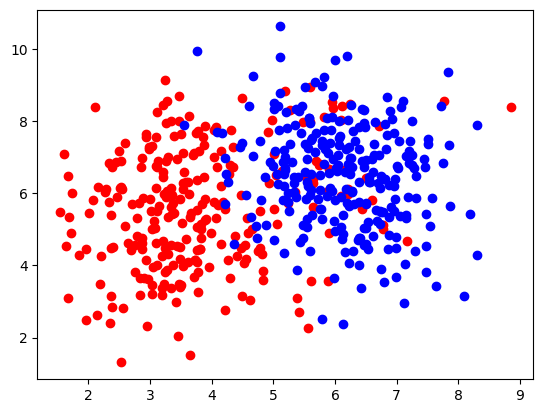

In [4]:
# The pickle file contains two dataset, a large one and a small one 
# sampled from the same distribution
pickle_read = open("Datasets_CCE2502_2022_23.pck","rb")
datasets = pickle.load(pickle_read)
# let's plot the larger one
D = np.copy(datasets[0])
data_scatter_plot(D[:,1:3], D[:,3])

In [5]:
# Shuffle and split into train and test
# Do not change this code
pickle_read = open("Datasets_CCE2502_2022_23.pck","rb")
datasets = pickle.load(pickle_read)
D = np.copy(datasets[0])
#
m = D.shape[0]
S = int(m*0.7)
np.random.seed(0)
np.random.shuffle(D)
X_train, y_train = D[0:S,1:3], D[0:S,3]
X_test, y_test = D[S:,1:3], D[S:,3]
print("Training set size", X_train.shape, y_train.shape)
print("Testing set size ", X_test.shape, y_test.shape)

Training set size (367, 2) (367,)
Testing set size  (158, 2) (158,)


## QUESTION 1 [10 marks]
### Compute the accuracy on the test set for k=1
Use above given k_nearest_neighbour_euclidian() function

In [6]:
def k_nearest_neighbour_euclidian_accuracy(k, X_train, y_train, X_test, y_test):
    model = lambda X_test : k_nearest_neighbour_euclidian(k, X_train, y_train, X_test)

    total = functools.reduce(
        lambda t, r : t + (1 if r[0] == r[1] else 0),
        zip(
            y_test,
            map(model, X_test)
        ),
        0
    )

    return float(total) / len(X_test)


k_nearest_neighbour_euclidian_accuracy(1, X_train, y_train, X_test, y_test)

0.810126582278481

## QUESTION 2 [10 marks]
### Find k (in the range of [1, 21]) that maximises the accuracy

In [7]:
np.argmax([k_nearest_neighbour_euclidian_accuracy(k, X_train, y_train, X_test, y_test) for k in range(1, 21 + 1)]) + 1

17

## Timing the code using time.time( ) function
We would like to time the code to carry out empirical time complexity analysis. Below are some examples.

In [8]:
# We want to record the time taken when predicting 
# output using the kNN model

import time

def knn_vector(X_train, y_train, X_test, y_test, k):
    """
    This function takes multiple new instances
    x_new is a [N,2] matrix of new inputs
    """
    N = X_test.shape[0]
    pred = np.empty(N)
    for i in range(N):
        pred[i] = k_nearest_neighbour_euclidian(k, X_train, 
                                            y_train, X_test[i])
    return (pred==y_test).mean()

start_time = time.time()
acc = knn_vector(X_train, y_train, X_test, y_test, 17)
end_time = time.time()
print("Accuracy =", acc)
print("Time taken =", end_time-start_time)

Accuracy = 0.8670886075949367
Time taken = 0.008400917053222656


In [9]:
# Because of house keeping processes, 
# perhaps it's better to run it multiple times,
# and take the median or mean 

duration = np.empty(100)
for i in range(100):
    start_time = time.time()
    acc = knn_vector(X_train, y_train, X_test, y_test, 17)
    end_time = time.time()
    duration[i] = end_time-start_time
print("The median duration =", np.median(duration))
print("The mean duration   =", np.mean(duration))

The median duration = 0.007287025451660156
The mean duration   = 0.007324397563934326


## QUESTION 3 [10 marks]
### Would you prefer to use the mean() or the median() in the above timing routine? Give reasons for your answer.


The min duration =  0.0072290897369384766
The max duration =  0.008915901184082031


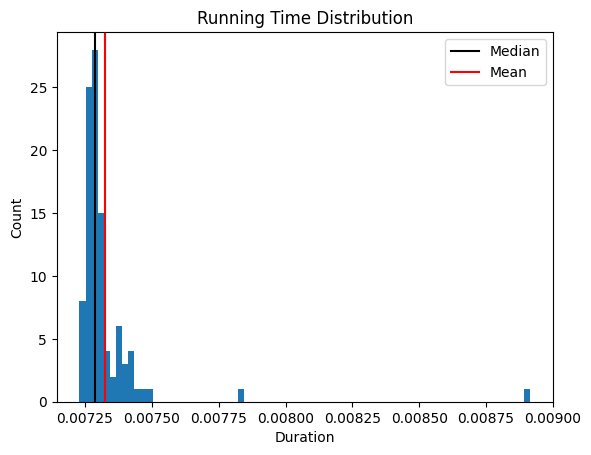

In [10]:
print("The min duration = ", np.min(duration))
print("The max duration = ", np.max(duration))

plt.figure()
plt.hist(x=duration, bins='auto')
plt.title("Running Time Distribution")
plt.xlabel("Duration")
plt.ylabel("Count")
plt.axvline(np.median(duration), color="black", label="Median")
plt.axvline(np.mean(duration), color="red", label="Mean")
plt.legend()
plt.show()

Both the **median** and the **mean** are metrics used to try and find the center
of a dataset. The **mean** is generally good at find the mean when the
distribution of the dataset is symmetric about a value without many outliers.
The **mean** is not ideal for when outliers are present in the dataset because
that outlier due to its own magnitude relative to the rest of the dataset will
essentially pull the **mean** towards it. This happens because of the nature of
how the **mean** calculated. The **median** on the other hand is more useful
when you have outliers present in the distribution. This is because outliers are
generally a few and that means that when sorting the data and finding the value
at the exact center will be less effected. The only way in which the median can
be effected is if there is not large number of outliers hence shifting the
location of the median even more. But at that point the outliers are no longer
outliers and become a integral part of the distribution.

As we can see in the above diagram there a few outliers in our dataset and it is
quite skewed. Hence following the reasoning above the ideal metric here will the
**median**. In fact, it is closer to the peak of our distribution.

## kd-tree algorithm for efficient search
We can organise the data in a kd-tree for a more efficient search. In this exercise you will use a small dataset (21 examples) to demonstrate how the feature space is organised. For more information on the kd-tree algorithm see class notes and text book. We first load the dataset:

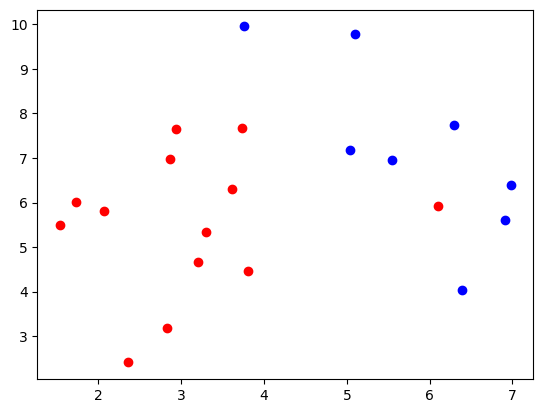

In [11]:
# Load the small dataset
pickle_read = open("Datasets_CCE2502_2022_23.pck","rb")
datasets = pickle.load(pickle_read)
D_s = np.copy(datasets[1])
data_scatter_plot(D_s[:,1:3], D_s[:,3])

## QUESTION 4 [30 marks]
### Develop python code to carry out the following steps:
1. Split the dataset on the first feature (column 1) into two balanced sets (left_set_0 and right_set_0). Write down the IDs of the examples in the left_set and right_set and the ID of the root node.
2. Plot the hyperplane on the scatter plot.
3. Next, split the left_set_0 on the second feature (column 2) into two further sets (left_set_1 and right_set_1). Write down the IDs of the examples in the left_set and right_set and the ID of the root node.
2. Plot the hyperplane on the scatter plot.

In [12]:
from matplotlib.colors import ListedColormap

def partition_multi(data, i, j):
    """
    data: A list of vectors
    i: The partitioning row
    j: The column to partition with
    Description: This function has the same behavior as np.partition however,
    it is capable of partitioning a list of vectors based using the jth column
    of the vectors for comparison
    """
    return i, data[np.argpartition(data[:, j], i)]

class BinaryTree:
    def __init__(self):
        self.node = None
        self.left = None
        self.right = None

def build_kd_tree(data, n, m):
    data.shape is tuple, "data.shape is not present"

    """
    data: A list of vectors
    n: The dimension of the vectors
    m: The depth of the tree
    Description: This algorithm will generate a tree of the from
    (k, vector) Left Right where k is kth column of the vector starting
    from 0 to n - 1. Increasing the depth of the tree will increase the
    number of partitions.
    """

    def build_kd_tree_internal(tree, data, n, k, m):
        if not tree and len(data) == 0:
            return

        i, data = partition_multi(data, int(len(data)/2), k)

        tree.node = (k, data[i])

        if m - 1> 0 and len(data[:i]) > 0:
            tree.left = BinaryTree()
            build_kd_tree_internal(tree.left, data[:i], n, (k + 1) % n, m - 1)

        if m - 1  > 0 and len(data[i+1:]) > 0:
            tree.right = BinaryTree()
            build_kd_tree_internal(tree.right, data[i+1:], n, (k + 1) % n, m - 1)

    tree = BinaryTree()

    build_kd_tree_internal(tree, data, n, 0, m)

    return tree

def pre_order(root):
    """
    root: A BinaryTree
    Description: A simple method for printing trees in a pre-order fashion
    i.e. Root
          Left
          Right
    """

    def pre_order_internal(root, n):
        if root:
            print(n * ' ', root.node)
            pre_order_internal(root.left, n + 1)
            pre_order_internal(root.right, n + 1)

    pre_order_internal(root, 0)

def plot_hyperplanes_for_2D(ax, xlim, ylim, root, linewidth=3, alpha=0.80):
    """
    ax: matplotlib Axes
    xlim: [xmin, xmax]
    ylim: [ymin, ymax]
    root: BinaryTree
    linewidth: float
    alpha: float
    Description: This function executes recursively to plot hyperplanes
    which partition the feature space. This function only works for 2D
    feature spaces. Additionally, the linewidth is multiplied by alpha over
    every iteration to thinner and thinner lines as the algorithm recurses.
    """

    if root:
        k, sample = root.node

        if k == 0:
            ax.vlines(x=sample[k], ymin=ylim[0], ymax=ylim[1], linewidth=linewidth, colors="black")
            plot_hyperplanes_for_2D(ax, [xlim[0],sample[k]], ylim, root.left, linewidth=linewidth*alpha, alpha=alpha)
            plot_hyperplanes_for_2D(ax, [sample[k],xlim[1]], ylim, root.right, linewidth=linewidth*alpha, alpha=alpha)

        if k == 1:
            ax.hlines(y=sample[k], xmin=xlim[0], xmax=xlim[1], linewidth=linewidth, colors="black")
            plot_hyperplanes_for_2D(ax, xlim, [ylim[0],sample[k]], root.left, linewidth=linewidth*alpha, alpha=alpha)
            plot_hyperplanes_for_2D(ax, xlim, [sample[k],ylim[1]], root.right, linewidth=linewidth*alpha, alpha=alpha)

        assert k == 0 or k == 1, 'k not 0 or 1'

 (0, array([4.5, 5. ]))
  (1, array([2.25, 5.5 ]))
   (0, array([3.5 , 5.25]))
    (1, array([3.  , 3.25]))
    (1, array([4., 4.]))
   (0, array([3.25, 8.25]))
    (1, array([2.75, 7.5 ]))
    (1, array([3.75, 8.  ]))
  (1, array([5.5 , 6.75]))
   (0, array([6.75, 3.  ]))
    (1, array([4.75, 6.25]))
    (1, array([7.25, 5.75]))
   (0, array([7.5, 8. ]))
    (1, array([5.25, 9.5 ]))
    (1, array([8.25, 8.5 ]))


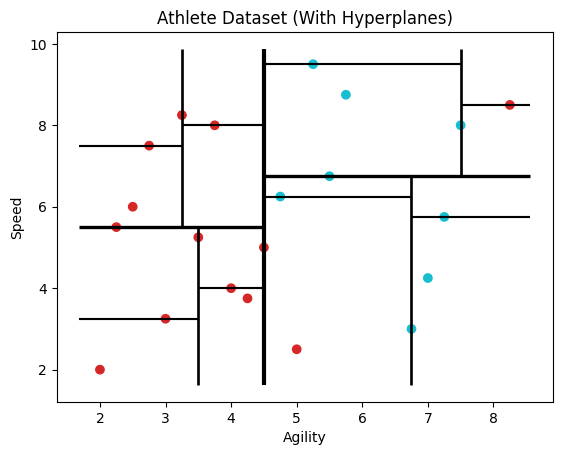

In [13]:
# NOTE: Testing with the athlete dataset from the lectures to ensure correctness of above algorithms

athlete_dataset = np.array([
    [2.50, 6.00, 0], 
    [3.75, 8.00, 0],
    [2.25, 5.50, 0],
    [3.25, 8.25, 0],
    [2.75, 7.50, 0],
    [4.50, 5.00, 0],
    [3.50, 5.25, 0],
    [3.00, 3.25, 0],
    [4.00, 4.00, 0],
    [4.25, 3.75, 0],
    [2.00, 2.00, 0],
    [5.00, 2.50, 0],
    [8.25, 8.50, 0],
    [5.75, 8.75, 1],
    [4.75, 6.25, 1],
    [5.50, 6.75, 1],
    [5.25, 9.50, 1],
    [7.00, 4.25, 1],
    [7.50, 8.00, 1],
    [7.25, 5.75, 1],
    [6.75, 3.00, 1]])

athlete_tree = build_kd_tree(athlete_dataset[:, :-1], len(athlete_dataset[:, :-1][0]), 4)

pre_order(athlete_tree)

figure, ax = plt.subplots()

# Data
ax.scatter(athlete_dataset[:, 0], athlete_dataset[:, 1], c=athlete_dataset[:, 2], cmap=ListedColormap(['#d62728', '#17becf']))

# Hyperplanes
plot_hyperplanes_for_2D(ax, ax.get_xlim(), ax.get_ylim(), athlete_tree)

plt.ylabel('Speed')
plt.xlabel('Agility')
plt.title('Athlete Dataset (With Hyperplanes)')

plt.show()

IDs of Left Set 0:  [ 8. 12. 18. 17.  4. 16.  6.  7.  5. 20.]
IDs of Right Set 0:  [13.  0. 11.  1. 15.  9.  3.  2. 19. 10.]
---
IDs of Left Set 1:  [17. 16. 12.  5.  4.]
IDs of Right Set 1:  [ 8.  7.  6. 20.]
---
 (0, array([3.73693672, 7.66219813]))
  (1, array([2.06837796, 5.82103438]))
  (1, array([5.54781819, 6.96031964]))


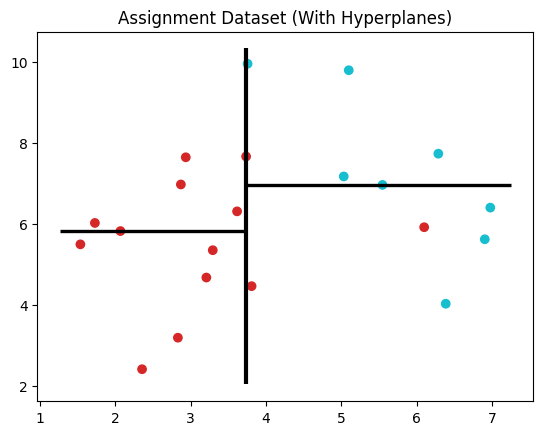

In [14]:
# NOTE: Answer for the actual question

small_dataset = datasets[1]

# Q4.1

i, partitioned_dataset = partition_multi(small_dataset, int(len(small_dataset)/2), 1)

left_set_0 = partitioned_dataset[:i]
right_set_0 = partitioned_dataset[i+1:]

print("IDs of Left Set 0: ", left_set_0[:,0])
print("IDs of Right Set 0: ", right_set_0[:,0])

# Q4.3

i, partitioned_dataset = partition_multi(left_set_0, int(len(left_set_0)/2), 2)

left_set_1 = partitioned_dataset[:i]
right_set_1 = partitioned_dataset[i+1:]

print("---")

print("IDs of Left Set 1: ", left_set_1[:,0])
print("IDs of Right Set 1: ", right_set_1[:,0])

# Q4.2 and Q4.4

filtered_dataset = small_dataset[:, 1:]

kdtree_small_dataset = build_kd_tree(filtered_dataset[:, :-1], 2, 2)

print("---")

pre_order(kdtree_small_dataset)

figure, ax = plt.subplots()

# Data
ax.scatter(filtered_dataset[:, 0], filtered_dataset[:, 1], c=filtered_dataset[:, 2], cmap=ListedColormap(['#d62728', '#17becf']))

# Hyperplanes
plot_hyperplanes_for_2D(ax, ax.get_xlim(), ax.get_ylim(), kdtree_small_dataset)

plt.title('Assignment Dataset (With Hyperplanes)')

plt.show()

## cKDTree algorithm from scipy library
As you might have suspected, building the tree requires significant effort. For the next exercise we will use a ready made implementation from the scipy library. More specifically we will make use of the cKDTree algorithm to implement a kNN model. Below is an example code of how to use the function.

In [15]:
from scipy.spatial import cKDTree

#First re-load and split the large dataset, to make sure it's intact.
pickle_read = open("Datasets_CCE2502_2022_23.pck","rb")
datasets = pickle.load(pickle_read)
D = np.copy(datasets[0])
#
m = D.shape[0]  #Number of instances in dataset
S = int(m*0.7)
np.random.seed(0)
np.random.shuffle(D)
X_train, y_train = D[0:S,1:3], D[0:S,3]
X_test, y_test = D[S:,1:3], D[S:,3]

#We then proceed to build the tree from the training data
tree = cKDTree(X_train, leafsize=1)

#We then use the tree to seach for k nearest neighbours
k=17
N = y_test.shape[0]
pred = np.empty(N)
for j in range(N):
    _, ind = tree.query(X_test[j].reshape(1, -1), k)  
    first_k = y_train[ind]
    r = first_k.sum()
    if r > k/2.:
        pred[j] = 1
    else: pred[j]=0
print("Accuracy =",(pred==y_test).mean())


Accuracy = 0.8670886075949367


## Question 5 [10 marks]

### Copy the above kdTree code and add timing code  to study whether it results in faster execution than searching across the whole dataset, as in the standard kNN.

note: We are mainly interested in the time taken during inference, since the tree is constructed once (training part). However we use it multiple times to predict the output from new input features.  
### What do you conclude from the timing exercise?

In [16]:
def knn_vector(X_train, y_train, X_test, y_test, k):
    N = X_test.shape[0]
    pred = np.empty(N)
    
    for i in range(N):
        pred[i] = k_nearest_neighbour_euclidian(k, X_train, y_train, X_test[i])

    return (pred == y_test).mean()

start_time = time.time()
acc = knn_vector(X_train, y_train, X_test, y_test, 17)
end_time = time.time()
kNN_normal_time = end_time-start_time

print("kNN (Normal)")
print("Accuracy = ", acc)
print("Time Taken = ", kNN_normal_time)

def knn_vector_kdtree(tree, y_train, X_test, y_test, k):
    N = y_test.shape[0]
    pred = np.empty(N)

    for i in range(N):
        _, ind = tree.query(X_test[i].reshape(1, -1), k)  
        first_k = y_train[ind]
        r = first_k.sum()

        if r > k/2.:
            pred[i] = 1
        else:
            pred[i] = 0
    
    return (pred == y_test).mean()

tree = cKDTree(X_train, leafsize=1)

start_time = time.time()
acc = knn_vector_kdtree(tree, y_train, X_test, y_test, 17)
end_time = time.time()
kNN_kdtree_time = end_time-start_time

print("---")

print("kNN (k-d Tree)")
print("Accuracy = ", acc)
print("Time Taken = ", kNN_kdtree_time)

print("---")
print("Time Difference (|Normal - k-d Tree|) = ", np.abs(kNN_normal_time - kNN_kdtree_time))
print("Time Ration (Normal / k-d Tree) = ", kNN_normal_time / kNN_kdtree_time)

kNN (Normal)
Accuracy =  0.8670886075949367
Time Taken =  0.008443832397460938
---
kNN (k-d Tree)
Accuracy =  0.8670886075949367
Time Taken =  0.0031888484954833984
---
Time Difference (|Normal - k-d Tree|) =  0.005254983901977539
Time Ration (Normal / k-d Tree) =  2.6479252336448598


From initial inspection and timings the kNN function which uses the k-d Tree seems to perform better whilst maintaining the same accuracy.


In [17]:
duration_normal = np.empty(100)
for i in range(100):
    start_time = time.time()
    acc = knn_vector(X_train, y_train, X_test, y_test, 17)
    end_time = time.time()
    duration_normal[i] = end_time-start_time

tree = cKDTree(X_train, leafsize=1)

duration_kdtree = np.empty(100)
for i in range(100):
    start_time = time.time()
    acc = knn_vector_kdtree(tree, y_train, X_test, y_test, 17)
    end_time = time.time()
    duration_kdtree[i] = end_time-start_time

print("kNN (Normal)")
print("The median duration =", np.median(duration_normal))
print("The mean duration =", np.mean(duration_normal))

print("---")

print("kNN (k-d Tree)")
print("The median duration =", np.median(duration_kdtree))
print("The mean duration =", np.mean(duration_kdtree))

kNN (Normal)
The median duration = 0.00732266902923584
The mean duration = 0.007361843585968018
---
kNN (k-d Tree)
The median duration = 0.0029670000076293945
The mean duration = 0.0029945826530456544


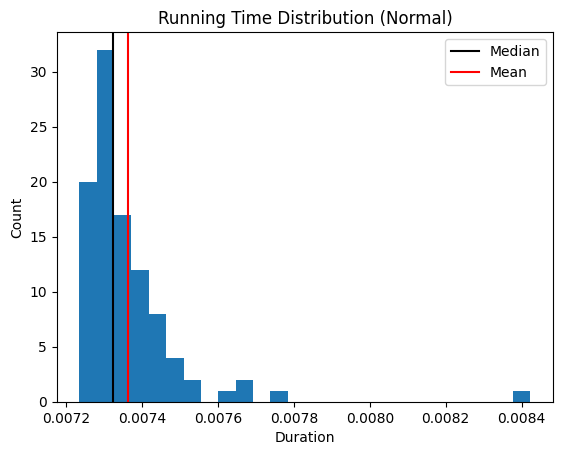

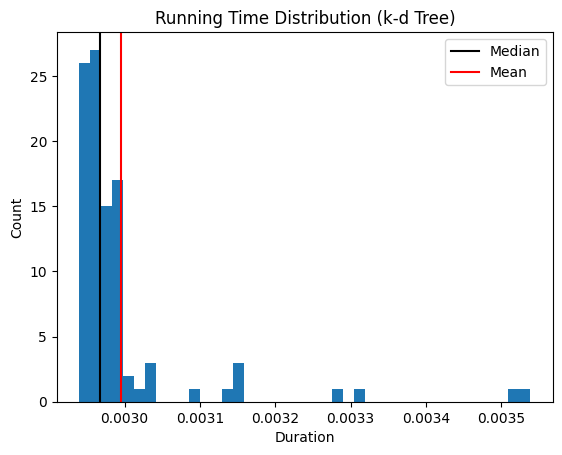

In [18]:
plt.figure()
plt.hist(x=duration_normal, bins='auto')
plt.title("Running Time Distribution (Normal)")
plt.xlabel("Duration")
plt.ylabel("Count")
plt.axvline(np.median(duration_normal), color="black", label="Median")
plt.axvline(np.mean(duration_normal), color="red", label="Mean")
plt.legend()
plt.show()

plt.figure()
plt.hist(x=duration_kdtree, bins='auto')
plt.title("Running Time Distribution (k-d Tree)")
plt.xlabel("Duration")
plt.ylabel("Count")
plt.axvline(np.median(duration_kdtree), color="black", label="Median")
plt.axvline(np.mean(duration_kdtree), color="red", label="Mean")
plt.legend()
plt.show()

In [19]:
print("Time Ratio (Normal / k-d Tree) = ", np.median(duration_normal)/np.median(duration_kdtree))

Time Ratio (Normal / k-d Tree) =  2.4680380891156735


In both cases we have outliers making the **median** the better choice for
approximating the center value of our dataset. And as we can see from the above
cell the running time of the kNN with a k-d Tree is roughly 1.7 times faster
than kNN without a k-d Tree (on my desktop machine).

(Additionally, on my laptop kNN with a k-d Tree is roughly 2.4 times faster.) 


## Time complexity Analysis
In this last question you will empirically carry out a time complexity analysis of both the standard exhaustive search kNN algorithm, (our k_nearest_neighbour_euclidian()) and the kdTree search kNN algorithm, (scipy's cKDTree model). 

For this study you will use a synthetically generated dataset, that allows you to vary its size. See below function (based on sklearn library) that generates the two moons binary classification dataset. The function allows you to define the size of the set and noise in the samples. 

In [20]:
from sklearn.datasets import make_moons

def generate_dataset(size=1000, noise_mag = 0.2):
    """
    size : number of samples (instances) in dataset
    noise_mag : magnitude of noise in samples
    """
    datasets = [
        make_moons(n_samples = size, shuffle = True,
                   noise = noise_mag, random_state = 0)]
    return datasets[0][0], datasets[0][1]

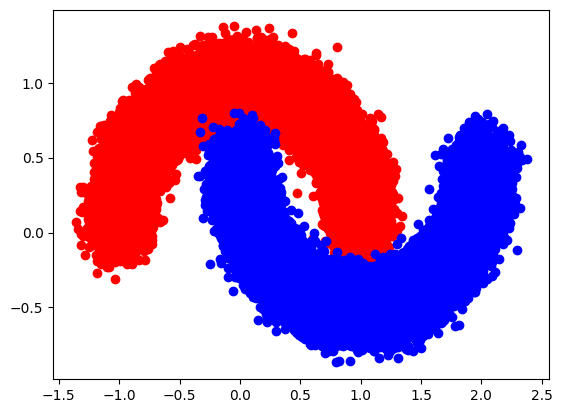

In [21]:
# Example of dataset 
# Feel free to experiment with size and noise figures
X, y = generate_dataset(100000,0.1)
data_scatter_plot(X, y)

## QUESTION 6 [30 marks]

Develop a computational  experiment to compare the time complexity of the two algoithms. In other words you have to record the computational time to predict a fixed number of test samples for various dataset sizes, for example, size = 1000, 10000, 100000 and 1000000.

In this experiment fix k=11, noise=0.2, and test_set_size=200.

Although not required, you can use the accuracy metric as a sanity check (i.e models with various dataset sizes are returning similar accuracy results).

Ignore time taken to build the tree.

### What do you conclude from the experiment?

### Explain the limitations of your experimental setup.

In [22]:
# NOTE: Should take roughly around 1 minute to finish executing

s = 3
e = 7

dataset_sizes = np.logspace(s, e, num=e-s+1, base=10).astype(np.longlong)

k = 11;
noise = 0.2
test_set_size = 200

time_against_n_normal = []
time_against_n_kdtree = []

for dataset_size in dataset_sizes[:4]:
    X, y = generate_dataset(dataset_size, noise)

    np.random.seed(0)
    np.random.shuffle(X)

    X_train, y_train = X[:-test_set_size], y[:-test_set_size]
    X_test, y_test = X[-test_set_size:], y[-test_set_size:]

    start_time = time.time()
    acc = knn_vector(X_train, y_train, X_test, y_test, k)
    end_time = time.time()
    time_against_n_normal.append([dataset_size, end_time - start_time])
    # print("Accuracy Normal ("+str(dataset_size)+") =", acc)

    tree = cKDTree(X_train, leafsize=1)

    start_time = time.time()
    acc = knn_vector_kdtree(tree, y_train, X_test, y_test, k)
    end_time = time.time()
    time_against_n_kdtree.append([dataset_size, end_time - start_time])
    # print("Accuracy k-d Tree ("+str(dataset_size)+") =", acc)

for dataset_size in dataset_sizes[4:]:
    X, y = generate_dataset(dataset_size, noise)

    np.random.seed(0)
    np.random.shuffle(X)

    X_train, y_train = X[:-test_set_size], y[:-test_set_size]
    X_test, y_test = X[-test_set_size:], y[-test_set_size:]

    tree = cKDTree(X_train, leafsize=1)

    start_time = time.time()
    acc = knn_vector_kdtree(tree, y_train, X_test, y_test, k)
    end_time = time.time()
    time_against_n_kdtree.append([dataset_size, end_time - start_time])
    # print("Accuracy k-d Tree ("+str(dataset_size)+") =", acc)


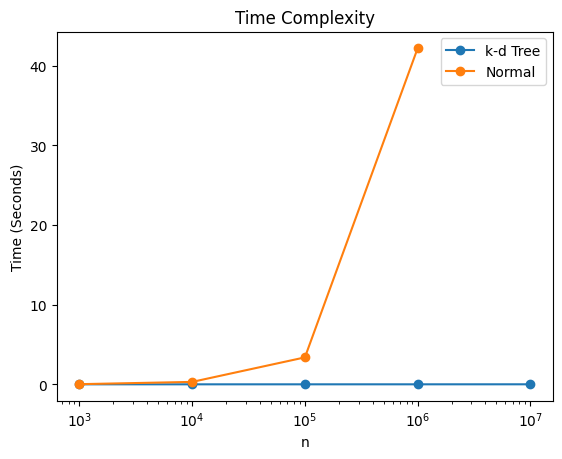

In [23]:
time_against_n_normal = np.array(time_against_n_normal)
time_against_n_kdtree = np.array(time_against_n_kdtree)

figure, ax = plt.subplots()

ax.plot(np.array(time_against_n_kdtree)[:, 0], np.array(time_against_n_kdtree)[:, 1], marker="o", label="k-d Tree")
ax.plot(np.array(time_against_n_normal)[:, 0], np.array(time_against_n_normal)[:, 1], marker="o", label="Normal")

ax.set_xscale("log")

plt.xlabel("n")
plt.ylabel("Time (Seconds)")
plt.title("Time Complexity")
plt.legend()
plt.show()

## Conclusion

kNN with a k-d Tree is significantly faster for large datasets assuming that the
training phase i.e. building the k-d Tree has been done beforehand. This is
expected because a k-d Tree reduces the number of neighbors the algorithm has to
consider by half every time the algorithm moves down a layer in the tree.

## Limitations

- Building the k-d Tree is a very expensive operation which still requires a lot
of time. However, this can be outsourced to a very powerful computer which can
build the tree quickly. Weaker machines can then benefit from the work done by
the powerful computer. This can be seen in the figure above as the time taken by
the algorithm which uses the k-d Tree is almost $0$ even for datasets whose size
is $10^7$. 
- The experiment for datasets of larger size is very slow and consequently hard
to test. (In fact, on my machine a dataset whose size is $10^8$ crashes the
kernel.)
- The overall shape of the dataset is not representative of all possible
datasets and how the algorithm will perform given any dataset.
- This experiment does not highlight the fact that a k-d Tree search is an 
$O(\log n)$ operation.
- Finally, the results of the experiment are specific to the hardware and
software environment in which the experiment is run.